# Springboard Data Science Career Track - March 2 Cohort

Date: 2020-05-18

By:			Justin Huang | justin.j.huang@gmail.com

Advisor:	Blake Arensdorf | blake.arensdorf@gmail.com


=============================================================
# Unit 5.4.5 - Capstone Data Wrangling
=============================================================

There are 3 sources files for this project:

- 2 primary source files were found on kaggle (games_csv and teams_csv).
    https://www.kaggle.com/nathanlauga/nba-games#games_details.csv

- 1 secondary source file was created by myself (additional conference/division data for each team)

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Loading the DataFrames
=========================================

In [2]:
#Load Data

games_csv = '../_raw data/nba games/games.csv'
teams_csv = '../_raw data/nba games/teams.csv'
teams_conf_div_csv = '../_raw data/nba games/teams_conf_div.csv'

loading_games_df = pd.read_csv(games_csv, parse_dates=['GAME_DATE_EST'])
loading_teams_df = pd.read_csv(teams_csv)
loading_teams_conf_div_df = pd.read_csv(teams_conf_div_csv)

# Inspecting the _Teams_ DataFrame...
==============================================================

In [3]:
loading_teams_df.head(30)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [4]:
loading_teams_conf_div_df.head(30)

,TEAM_ID,CONFERENCE,DIVISION
0,1610612737,East,Southeast
1,1610612738,East,Atlantic
2,1610612740,West,Southwest
3,1610612741,East,Central
4,1610612742,West,Southwest
5,1610612743,West,Northwest
6,1610612745,West,Southwest
7,1610612746,West,Pacific
8,1610612747,West,Pacific
9,1610612748,East,Southeast


In [5]:
loading_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
LEAGUE_ID             30 non-null int64
TEAM_ID               30 non-null int64
MIN_YEAR              30 non-null int64
MAX_YEAR              30 non-null int64
ABBREVIATION          30 non-null object
NICKNAME              30 non-null object
YEARFOUNDED           30 non-null int64
CITY                  30 non-null object
ARENA                 30 non-null object
ARENACAPACITY         26 non-null float64
OWNER                 30 non-null object
GENERALMANAGER        30 non-null object
HEADCOACH             30 non-null object
DLEAGUEAFFILIATION    30 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 3.4+ KB


# Missing Data Observations For _Teams_ DataFrame:

The 2 teams dataframes need to be merged so all common information can be contained in a single dataframe.
(conference, divsion, etc.)

Next is to create a final teams dataframe that will be used for the assignment with only the relevant columns. (For example, we don't care about who the Team Owner or General manager is, so those columns will be removed).

In [6]:
# This will be the Teams dataframe that will be used for the capstone
teams_df_subset = loading_teams_df[['TEAM_ID', 'ABBREVIATION', 'NICKNAME', 'CITY']]
teams_df_subset

,TEAM_ID,ABBREVIATION,NICKNAME,CITY
0,1610612737,ATL,Hawks,Atlanta
1,1610612738,BOS,Celtics,Boston
2,1610612740,NOP,Pelicans,New Orleans
3,1610612741,CHI,Bulls,Chicago
4,1610612742,DAL,Mavericks,Dallas
5,1610612743,DEN,Nuggets,Denver
6,1610612745,HOU,Rockets,Houston
7,1610612746,LAC,Clippers,Los Angeles
8,1610612747,LAL,Lakers,Los Angeles
9,1610612748,MIA,Heat,Miami


In [7]:
# merge/map the 2 teams dataframes with only the required columns
teams_df = pd.merge(teams_df_subset, loading_teams_conf_div_df, on='TEAM_ID')
teams_df

,TEAM_ID,ABBREVIATION,NICKNAME,CITY,CONFERENCE,DIVISION
0,1610612737,ATL,Hawks,Atlanta,East,Southeast
1,1610612738,BOS,Celtics,Boston,East,Atlantic
2,1610612740,NOP,Pelicans,New Orleans,West,Southwest
3,1610612741,CHI,Bulls,Chicago,East,Central
4,1610612742,DAL,Mavericks,Dallas,West,Southwest
5,1610612743,DEN,Nuggets,Denver,West,Northwest
6,1610612745,HOU,Rockets,Houston,West,Southwest
7,1610612746,LAC,Clippers,Los Angeles,West,Pacific
8,1610612747,LAL,Lakers,Los Angeles,West,Pacific
9,1610612748,MIA,Heat,Miami,East,Southeast


In [8]:
teams_df.name = 'Teams'
teams_df.set_index('TEAM_ID', inplace=True)

# Summary
=========================================

Now we have a teams dataframe: [teams_df], ready for use.


In [9]:
teams_df

,ABBREVIATION,NICKNAME,CITY,CONFERENCE,DIVISION
TEAM_ID,,,,,
1610612737,ATL,Hawks,Atlanta,East,Southeast
1610612738,BOS,Celtics,Boston,East,Atlantic
1610612740,NOP,Pelicans,New Orleans,West,Southwest
1610612741,CHI,Bulls,Chicago,East,Central
1610612742,DAL,Mavericks,Dallas,West,Southwest
1610612743,DEN,Nuggets,Denver,West,Northwest
1610612745,HOU,Rockets,Houston,West,Southwest
1610612746,LAC,Clippers,Los Angeles,West,Pacific
1610612747,LAL,Lakers,Los Angeles,West,Pacific


# Inspecting the _Games_ DataFrame...
==============================================================

In [10]:
loading_games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


# Missing Data Observations for *Games* DataFrame:
1) Date Parsing: Need to add multiple date slicer columns (Month, Year, etc.)

2) Team Names: Will be convinient to have Team Short/Full Names (TOR, Raptors, Toronto)

3) Game Types: Will be good to know game type (Pre Season, Regular Season, Post Season)

# 1) Dates Parsing

In [11]:
# Extracting the D, M, Y from the Game Date
loading_games_df['dt_MONTH'] = pd.DatetimeIndex(loading_games_df['GAME_DATE_EST']).month
loading_games_df['dt_YEAR'] = pd.DatetimeIndex(loading_games_df['GAME_DATE_EST']).year
loading_games_df['dt_YEAR_MONTH'] = pd.to_datetime(loading_games_df['GAME_DATE_EST']).dt.to_period('M')
loading_games_df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,dt_MONTH,dt_YEAR,dt_YEAR_MONTH
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,93.0,0.402,0.762,0.226,20.0,61.0,0,3,2020,2020-03
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,111.0,0.468,0.632,0.275,28.0,56.0,0,3,2020,2020-03
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,130.0,0.505,0.650,0.488,27.0,37.0,1,3,2020,2020-03
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,118.0,0.461,0.897,0.263,24.0,36.0,1,3,2020,2020-03
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,100.0,0.413,0.667,0.429,23.0,42.0,1,3,2020,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,87.0,0.366,0.643,0.375,17.0,43.0,1,10,2014,2014-10
23191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,85.0,0.411,0.636,0.267,17.0,47.0,0,10,2014,2014-10
23192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,95.0,0.387,0.659,0.500,19.0,43.0,1,10,2014,2014-10
23193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,94.0,0.469,0.725,0.385,18.0,45.0,1,10,2014,2014-10


# 2) Team Names

In [12]:
# It would be convinient to have the full / short team names in our dataframe

games_teams_temp_df = loading_games_df[['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID']]
games_teams_temp_df

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID
0,21900895,1610612766,1610612749
1,21900896,1610612750,1610612742
2,21900897,1610612746,1610612755
3,21900898,1610612743,1610612761
4,21900899,1610612758,1610612765
...,...,...,...
23190,11400007,1610612737,1610612740
23191,11400004,1610612741,1610612764
23192,11400005,1610612747,1610612743
23193,11400002,1610612761,1610612758


In [13]:
# merge in names of home/visitor teams

games_teams_temp_df = pd.merge(games_teams_temp_df, teams_df['ABBREVIATION'], left_on='VISITOR_TEAM_ID', right_on='TEAM_ID')
games_teams_temp_df = pd.merge(games_teams_temp_df, teams_df['CITY'], left_on='VISITOR_TEAM_ID', right_on='TEAM_ID')
games_teams_temp_df = pd.merge(games_teams_temp_df, teams_df['NICKNAME'], left_on='VISITOR_TEAM_ID', right_on='TEAM_ID')


games_teams_temp_df = pd.merge(games_teams_temp_df, teams_df['ABBREVIATION'], left_on='HOME_TEAM_ID', right_on='TEAM_ID')
games_teams_temp_df = pd.merge(games_teams_temp_df, teams_df['CITY'], left_on='HOME_TEAM_ID', right_on='TEAM_ID')
games_teams_temp_df = pd.merge(games_teams_temp_df, teams_df['NICKNAME'], left_on='HOME_TEAM_ID', right_on='TEAM_ID')

games_teams_temp_df


,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,ABBREVIATION_x,CITY_x,NICKNAME_x,ABBREVIATION_y,CITY_y,NICKNAME_y
0,21900895,1610612766,1610612749,MIL,Milwaukee,Bucks,CHA,Charlotte,Hornets
1,21900669,1610612766,1610612749,MIL,Milwaukee,Bucks,CHA,Charlotte,Hornets
2,21300407,1610612766,1610612749,MIL,Milwaukee,Bucks,CHA,Charlotte,Hornets
3,21300228,1610612766,1610612749,MIL,Milwaukee,Bucks,CHA,Charlotte,Hornets
4,21201190,1610612766,1610612749,MIL,Milwaukee,Bucks,CHA,Charlotte,Hornets
...,...,...,...,...,...,...,...,...,...
23190,21800594,1610612749,1610612762,UTA,Utah,Jazz,MIL,Milwaukee,Bucks
23191,21700381,1610612749,1610612762,UTA,Utah,Jazz,MIL,Milwaukee,Bucks
23192,21600860,1610612749,1610612762,UTA,Utah,Jazz,MIL,Milwaukee,Bucks
23193,21501041,1610612749,1610612762,UTA,Utah,Jazz,MIL,Milwaukee,Bucks


In [14]:
# rename the columns
games_teams_temp_df.rename(columns={
    'ABBREVIATION_x':'HOME_TEAM_ABBR',
    'CITY_x':'HOME_TEAM_CITY',
    'NICKNAME_x':'HOME_TEAM_NICKNAME',
    
    'ABBREVIATION_y':'VISITOR_TEAM_ABBR',
    'CITY_y':'VISITOR_TEAM_CITY',
    'NICKNAME_y':'VISITOR_TEAM_NICKNAME',                                   
                                   }, inplace=True)

In [15]:
# double check the new column names:
games_teams_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23195 entries, 0 to 23194
Data columns (total 9 columns):
GAME_ID                  23195 non-null int64
HOME_TEAM_ID             23195 non-null int64
VISITOR_TEAM_ID          23195 non-null int64
HOME_TEAM_ABBR           23195 non-null object
HOME_TEAM_CITY           23195 non-null object
HOME_TEAM_NICKNAME       23195 non-null object
VISITOR_TEAM_ABBR        23195 non-null object
VISITOR_TEAM_CITY        23195 non-null object
VISITOR_TEAM_NICKNAME    23195 non-null object
dtypes: int64(3), object(6)
memory usage: 1.8+ MB


In [16]:
# merge together our temp dataframes to create the new, games df

games_df = pd.merge(loading_games_df, games_teams_temp_df)

In [17]:
games_df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,HOME_TEAM_WINS,dt_MONTH,dt_YEAR,dt_YEAR_MONTH,HOME_TEAM_ABBR,HOME_TEAM_CITY,HOME_TEAM_NICKNAME,VISITOR_TEAM_ABBR,VISITOR_TEAM_CITY,VISITOR_TEAM_NICKNAME
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,0,3,2020,2020-03,MIL,Milwaukee,Bucks,CHA,Charlotte,Hornets
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,0,3,2020,2020-03,DAL,Dallas,Mavericks,MIN,Minnesota,Timberwolves
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,1,3,2020,2020-03,PHI,Philadelphia,76ers,LAC,Los Angeles,Clippers
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,1,3,2020,2020-03,TOR,Toronto,Raptors,DEN,Denver,Nuggets
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,1,3,2020,2020-03,DET,Detroit,Pistons,SAC,Sacramento,Kings
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,1,10,2014,2014-10,NOP,New Orleans,Pelicans,ATL,Atlanta,Hawks
23191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,0,10,2014,2014-10,WAS,Washington,Wizards,CHI,Chicago,Bulls
23192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,1,10,2014,2014-10,DEN,Denver,Nuggets,LAL,Los Angeles,Lakers
23193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,1,10,2014,2014-10,SAC,Sacramento,Kings,TOR,Toronto,Raptors


# 3) Game Type

In [18]:
# I would like to easily distinguish between the different game types:
# Pre Season, 
# Regular Season, 
# Post Season (aka Playoffs)

# My hypothesis is that I can use the GAMEE_ID to deduce the game type.
# 1XX = Pre Season
# 2XX = Regular Season
# 4XX = Post Season

In [19]:
# Next, I would like to extract the first digit from the GAME_ID and use that as basis to determine GAME_TYPE
games_type_df = pd.DataFrame()

games_type_df['GAME_ID'] = games_df['GAME_ID']
games_type_df['SEASON'] = games_df['SEASON']
games_type_df['dt_MONTH'] = games_df['dt_MONTH']
games_type_df['GAME_TYPE_CODE'] = games_df['GAME_ID'].apply(lambda x: str(x)[0:1])
games_type_df['GAME_TYPE_CODE'] = games_type_df['GAME_TYPE_CODE'].astype(int)
games_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23195 entries, 0 to 23194
Data columns (total 4 columns):
GAME_ID           23195 non-null int64
SEASON            23195 non-null int64
dt_MONTH          23195 non-null int64
GAME_TYPE_CODE    23195 non-null int32
dtypes: int32(1), int64(3)
memory usage: 815.4 KB


In [20]:
def get_game_type(val):
    if int(val) == 1:
        return 'Pre Season'
    elif int(val) == 2:
        return 'Regular Season'
    elif int(val) == 4:
        return 'Post Season'
    else:
        return 'Unknown'

games_type_df['GAME_TYPE'] = games_type_df['GAME_TYPE_CODE'].apply(get_game_type)
games_type_df                                                                  

,GAME_ID,SEASON,dt_MONTH,GAME_TYPE_CODE,GAME_TYPE
0,21900895,2019,3,2,Regular Season
1,21900896,2019,3,2,Regular Season
2,21900897,2019,3,2,Regular Season
3,21900898,2019,3,2,Regular Season
4,21900899,2019,3,2,Regular Season
...,...,...,...,...,...
23190,11400007,2014,10,1,Pre Season
23191,11400004,2014,10,1,Pre Season
23192,11400005,2014,10,1,Pre Season
23193,11400002,2014,10,1,Pre Season


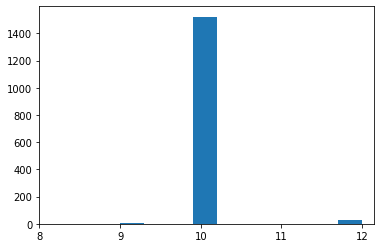

In [21]:
# Spot checking Pre Season

preseason_games_df = games_type_df[games_type_df['GAME_TYPE_CODE'] == 1]

plt.hist(preseason_games_df.dt_MONTH)
plt.xticks(np.arange(8,13,1))
plt.show()
    
#preseason_games_df.dt_MONTH.plot(kind='hist')


In [22]:
# We can see all games take place in the months Oct. 
# The outliers are as a result of the strike season 2011-12. As well as a handful of games taking place in Sept.

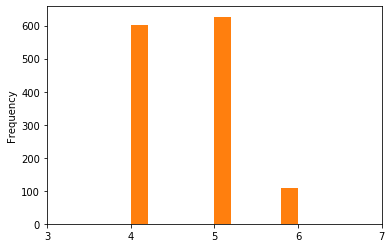

In [23]:
# Spot checking Post Season

postseason_games_df = games_type_df[games_type_df['GAME_TYPE_CODE'] == 4]
postseason_games_df.dt_MONTH.plot(kind='hist')

plt.hist(postseason_games_df.dt_MONTH)
plt.xticks(np.arange(3,8,1))
plt.show()


In [24]:
# We can see all games take place in the months April, May , June!

Now we can merge our game_types dataframe together with the original loading dataframe to create our final games dataframe.

In [25]:
games_df = pd.merge(games_df, games_type_df)

# Summary: Games
=========================================

Now we have a games dataframe ready to use!


In [26]:
games_df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,dt_YEAR,dt_YEAR_MONTH,HOME_TEAM_ABBR,HOME_TEAM_CITY,HOME_TEAM_NICKNAME,VISITOR_TEAM_ABBR,VISITOR_TEAM_CITY,VISITOR_TEAM_NICKNAME,GAME_TYPE_CODE,GAME_TYPE
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,2020,2020-03,MIL,Milwaukee,Bucks,CHA,Charlotte,Hornets,2,Regular Season
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,2020,2020-03,DAL,Dallas,Mavericks,MIN,Minnesota,Timberwolves,2,Regular Season
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,2020,2020-03,PHI,Philadelphia,76ers,LAC,Los Angeles,Clippers,2,Regular Season
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,2020,2020-03,TOR,Toronto,Raptors,DEN,Denver,Nuggets,2,Regular Season
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,2020,2020-03,DET,Detroit,Pistons,SAC,Sacramento,Kings,2,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,2014,2014-10,NOP,New Orleans,Pelicans,ATL,Atlanta,Hawks,1,Pre Season
23191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,2014,2014-10,WAS,Washington,Wizards,CHI,Chicago,Bulls,1,Pre Season
23192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,2014,2014-10,DEN,Denver,Nuggets,LAL,Los Angeles,Lakers,1,Pre Season
23193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,2014,2014-10,SAC,Sacramento,Kings,TOR,Toronto,Raptors,1,Pre Season


# Outliers

=========================================

In [27]:
games_df_outliers = games_df[['SEASON', 'GAME_TYPE']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000235396A2D48>,
      dtype=object)

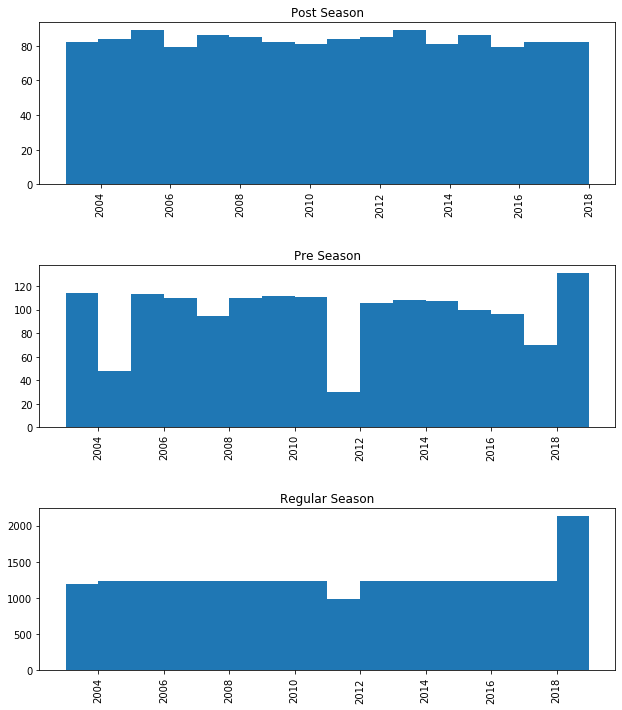

In [28]:
games_df_outliers.hist(by='GAME_TYPE'
                       ,bins=16
                       ,layout=(3,1)
                       ,figsize=(10,12)
                      )

In [29]:
games_df_outliers[(games_df_outliers['SEASON']==2019) & (games_df_outliers['GAME_TYPE']=='Regular Season')]


,SEASON,GAME_TYPE
0,2019,Regular Season
1,2019,Regular Season
2,2019,Regular Season
3,2019,Regular Season
4,2019,Regular Season
...,...,...
16126,2019,Regular Season
16127,2019,Regular Season
16128,2019,Regular Season
16129,2019,Regular Season


In [30]:
games_df_outliers.to_csv('output.csv')

We can see above

1) Post Season Games are about the same every season

2) Pre Season Games we will ignore for this analysis

3) Regular Season Games, we would expect the same number of games each season so must investigate further.
